##  Classification pipeline

### Last update: 8/24/19
### File: C:\Users\megan\OneDrive\Data_Analytics\C5T2_3\Credit default analysis.ipynb
### Project Name: Credit Default Analysis

In [337]:
#Import libraries and modules

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
import plotly
import plotly.tools as tls
%matplotlib inline

# machine learning
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = 30

In [338]:
#import data

#load train/existing data (dataset1)
credit = pd.read_csv('default of credit card clients.csv', header = 1)

#load predict/new data (dataset2)

### Data Pre-Processing

In [339]:
#check for missing data
print(credit.isnull().values.any())

False


In [340]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [341]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [342]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [343]:
credit['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [344]:
18112 / 30000

0.6037333333333333

In [345]:
11888 / 30000

0.39626666666666666

In [346]:
credit['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [347]:
23364 / 30000

0.7788

In [348]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

All variables are listed as integers in dataset. Need to change sex, education, and marriage to category after exploratory data analysis is done.

In [349]:
credit = credit.drop(columns=['ID'])

In [350]:
credit.rename(columns={"default payment next month": "default"}, inplace = True)

In [351]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [352]:
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [353]:
#group education levels 4,5,6 into single group 4 
#NOTE for future analysis, it would help to understand what 4,5,6 are
credit['EDUCATION'] = credit['EDUCATION'].replace([4, 5, 6], 4)

In [354]:
#check recode
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      454
0       14
Name: EDUCATION, dtype: int64

In [355]:
#check negative amounts for bill statements to see if they make sense
credit.nsmallest(10, 'BILL_AMT6')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
290,280000,1,1,2,33,-1,-1,-1,-1,-1,-1,898,898,325,898,325,-339603,898,325,898,325,0,345293,1
26097,290000,2,2,1,33,-2,-1,0,0,0,0,11303,17493,21036,17391,16348,-209051,17654,11068,7600,3352,6104,261883,0
12828,100000,2,1,2,25,2,2,-2,-2,-2,-2,100000,0,0,0,0,-150953,0,0,0,0,0,150400,0
29491,320000,1,1,2,31,1,-2,-2,-2,-2,-2,-6029,-9119,-46127,-50616,-53007,-94625,185,28,12,208,8,14,1
28919,180000,2,1,1,40,0,-1,0,0,0,0,34483,21142,11279,5698,5993,-73895,22864,1133,1000,1000,0,159000,0
27080,290000,1,1,2,38,-2,-2,-2,-2,-2,-2,2318,1818,2057,2278,1224,-57060,1827,2066,2287,1242,1827,60860,0
12388,450000,2,2,1,37,-1,-1,-1,-1,-1,-1,1212,791,2663,783,1730,-51443,1032,2663,783,1730,0,70803,1
3525,140000,1,1,2,28,0,-1,-1,0,-1,-1,3234,4324,5477,4490,1500,-51183,4340,5491,2013,1510,18,89898,0
21235,150000,1,1,2,36,2,2,2,-2,-2,-2,167094,86193,-25443,-46627,-46627,-46627,5068,9,0,0,0,0,1
5548,260000,2,2,2,26,0,0,0,0,-1,-1,164351,164244,158124,62373,746,-45734,7000,5115,2000,746,5025,54836,0


In [356]:
#check outliers - done with EDA below

In [357]:
#several rows with 0's across payment amt and bill amt. check how many
zero = (credit[(credit.PAY_AMT1 == 0) & (credit.PAY_AMT2 == 0) & (credit.PAY_AMT3 == 0) & (credit.PAY_AMT4 == 0) & \
             (credit.PAY_AMT5 == 0) & (credit.PAY_AMT6 == 0) & (credit.BILL_AMT1 ==0) & (credit.BILL_AMT2 ==0) & \
                   (credit.BILL_AMT3 == 0) & (credit.BILL_AMT4 == 0) & (credit.BILL_AMT5 == 0) & (credit.BILL_AMT6 == 0)])

In [358]:
print(zero.count())

LIMIT_BAL    795
SEX          795
EDUCATION    795
MARRIAGE     795
AGE          795
PAY_0        795
PAY_2        795
PAY_3        795
PAY_4        795
PAY_5        795
PAY_6        795
BILL_AMT1    795
BILL_AMT2    795
BILL_AMT3    795
BILL_AMT4    795
BILL_AMT5    795
BILL_AMT6    795
PAY_AMT1     795
PAY_AMT2     795
PAY_AMT3     795
PAY_AMT4     795
PAY_AMT5     795
PAY_AMT6     795
default      795
dtype: int64


There are a total of 795 rows where BOTH the bill amount and payment amount are zero. Assuming these are 0 balances with no usage.

### Exploratory Data Analysis

In [359]:
sns.set(style="darkgrid")

In [360]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


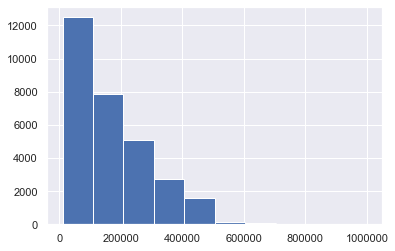

In [361]:
#visualize distributions
plt.hist(credit['LIMIT_BAL'])
plt.show()

In [362]:
credit['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

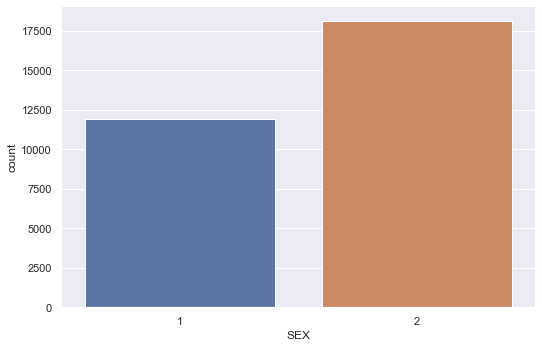

In [363]:
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

There are 1.5 more females in this dataset than males.

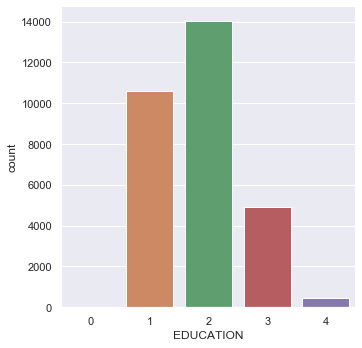

In [364]:
g = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1)
g.set_xlabels('EDUCATION')

There are only 14 people in the '0' education category. The others are grouped into category 4, which is still small compared to the others.

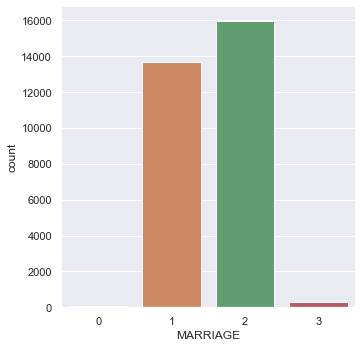

In [365]:
sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1)

Vast majority of customers are either married (1) or single (2).

In [366]:
# Number of men and women in each of the education levels
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4             162
2    0               6
     1            6231
     2            8656
     3            2927
     4             292
Name: SEX, dtype: int64

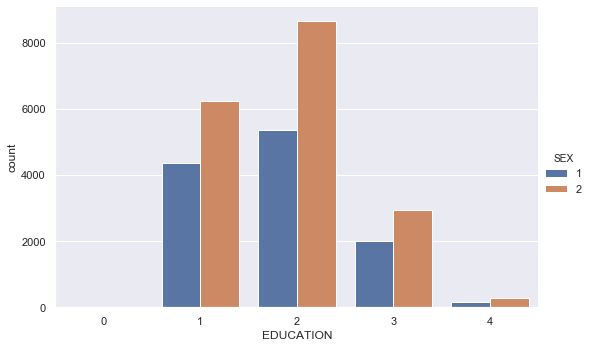

In [367]:
sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.5)

Distribution seems to fit the 1.5x females versus males. Females are higher in every education level and they trend similarly.

In [368]:
# Number of men and women in each of the education levels
credit.groupby(['EDUCATION', 'MARRIAGE'])['EDUCATION'].count()

EDUCATION  MARRIAGE
0          1              4
           2             10
1          0              4
           1           3722
           2           6809
           3             50
2          0              6
           1           6842
           2           7020
           3            162
3          0             44
           1           2861
           2           1909
           3            103
4          1            230
           2            216
           3              8
Name: EDUCATION, dtype: int64

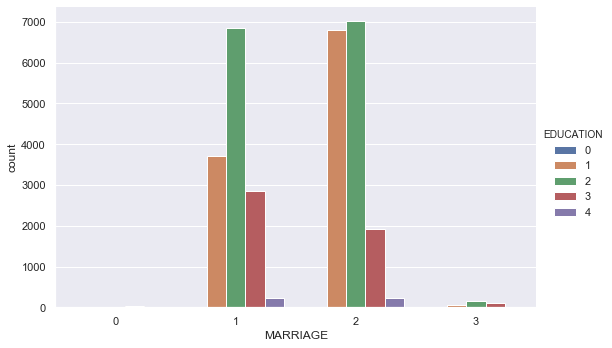

In [369]:
sns.catplot('MARRIAGE', data=credit, hue='EDUCATION', kind='count', aspect=1.5)

There are approx the same number of married (2) and single (1) people with university (2) education. There are much less married (2) people with graduate school (1) compared to single people.

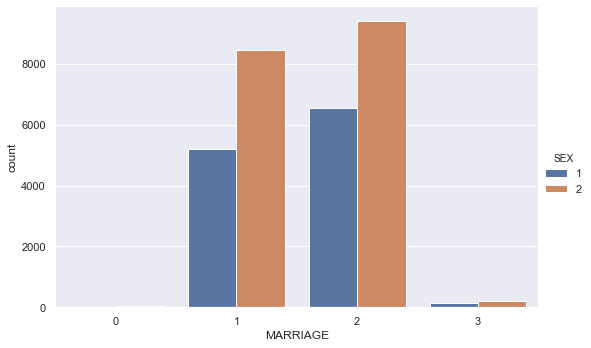

In [370]:
sns.catplot('MARRIAGE', data=credit, hue='SEX', kind='count', aspect=1.5)

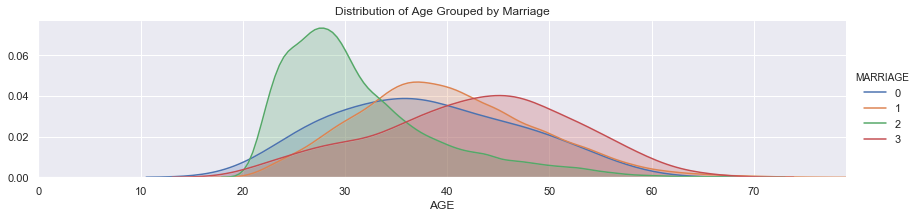

In [371]:
#distribution of age by marriage
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Marriage')
fig.add_legend()

As expected, the majority of the single (2) customers are also the youngest.

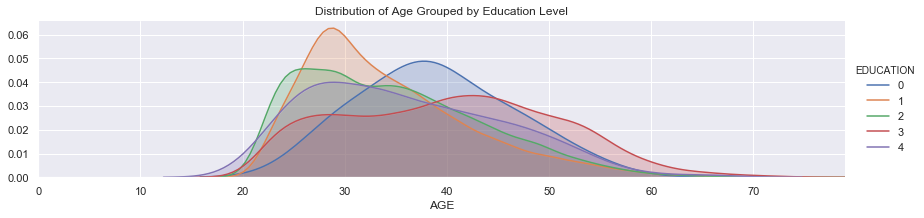

In [372]:
#distribution of age by education
fig2 = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig2.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig2.set(xlim=(0,oldest))
fig2.set(title='Distribution of Age Grouped by Education Level')
fig2.add_legend()

Also interesting that those with graduate schooling (1) also tend to be younger. More younger people have university (2)education vs the older population tend to have just high school (3) level.

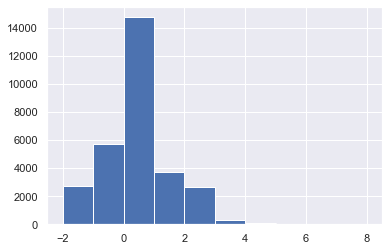

In [373]:
plt.hist(credit['PAY_0'])
plt.show()

There appear to be outliers in this group at the 7 month mark. Let's look closer at the actual values.

In [374]:
credit['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

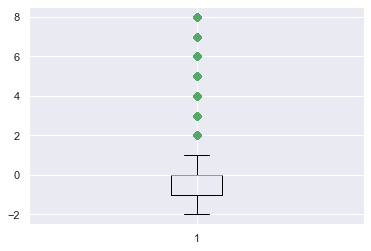

In [375]:
A = credit['PAY_0']
plt.boxplot(A,0,'gD')
plt.show()

Technically there are outlier values, but because they range from 2-8 and there is a significant number of them, they will not be removed. Logically, one would think delaying payment would be a significant factor on default risk.

In [376]:
# Review if sex relates to payment delays
credit.groupby(['PAY_0', 'SEX'])['PAY_0'].count()

PAY_0  SEX
-2     1       871
       2      1888
-1     1      2132
       2      3554
 0     1      6031
       2      8706
 1     1      1492
       2      2196
 2     1      1120
       2      1547
 3     1       159
       2       163
 4     1        44
       2        32
 5     1        18
       2         8
 6     1         6
       2         5
 7     1         5
       2         4
 8     1        10
       2         9
Name: PAY_0, dtype: int64

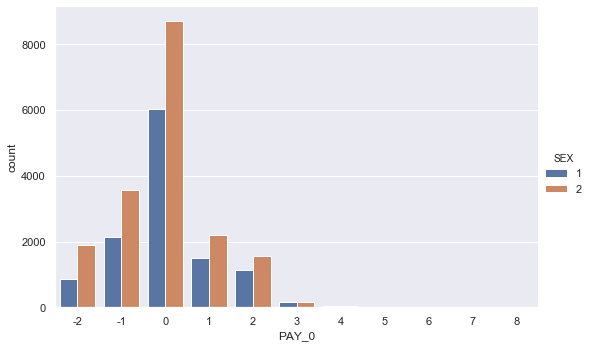

In [377]:
sns.catplot('PAY_0', data=credit, hue='SEX', kind='count', aspect=1.5)

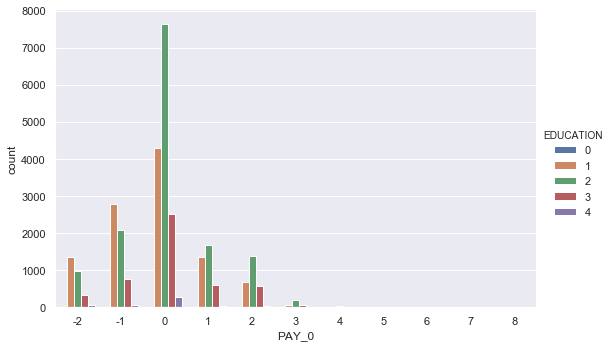

In [378]:
sns.catplot('PAY_0', data=credit, hue='EDUCATION', kind='count', aspect=1.5)

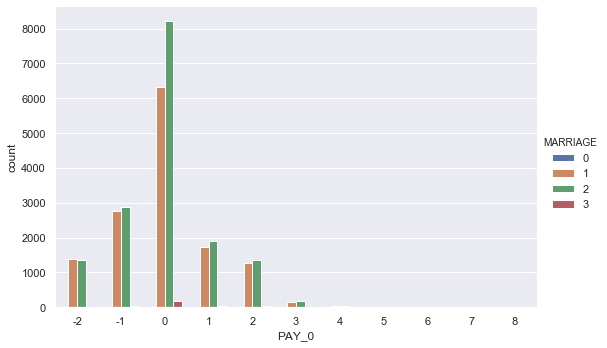

In [379]:
sns.catplot('PAY_0', data=credit, hue='MARRIAGE', kind='count', aspect=1.5)

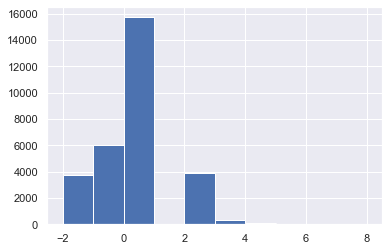

In [380]:
plt.hist(credit['PAY_2'])
plt.show()

In [381]:
credit['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

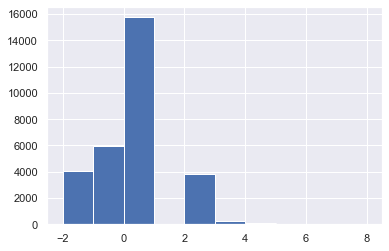

In [382]:
plt.hist(credit['PAY_3'])
plt.show()

In [383]:
credit['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

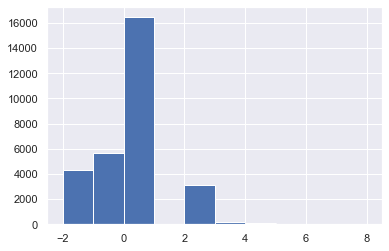

In [384]:
plt.hist(credit['PAY_4'])
plt.show()

In [385]:
credit['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

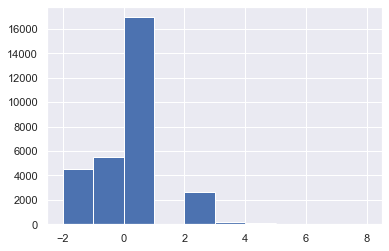

In [386]:
plt.hist(credit['PAY_5'])
plt.show()

In [387]:
credit['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

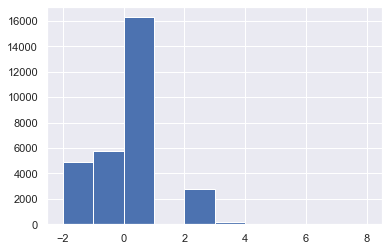

In [388]:
plt.hist(credit['PAY_6'])
plt.show()

In [389]:
credit['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

All of the payment columns show a highly left-skewed distribution, with 0 (no delay) being dominating group every time. Depending on model used will need to normalize later.

-165580
964511


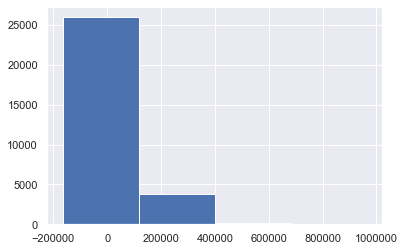

In [390]:
plt.hist(credit['BILL_AMT1'],4)
print(credit.BILL_AMT1.min())
print(credit.BILL_AMT1.max())

In [391]:
#who had the lowest bill?
credit[credit.BILL_AMT1 == -165580]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
12330,300000,1,2,1,37,1,-1,2,0,0,0,-165580,324392,296931,30355,26771,23737,505000,331,1070,17771,18000,16079,0


For first month tracked, a 37 year old, college educated, married male had the lowest bill (as a credit)

In [392]:
#who had the highest bill?
credit[credit.BILL_AMT1 == 964511]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
2197,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


For the first month tracked, a 47 year old, graduate school, married female had the highest bill.

-339603
961664


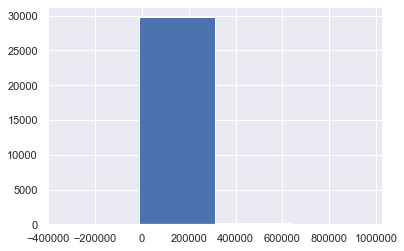

In [393]:
plt.hist(credit['BILL_AMT6'],4)
print(credit.BILL_AMT6.min())
print(credit.BILL_AMT6.max())

In [394]:
#are the same people the min/max for the sixth month?
credit[(credit.BILL_AMT6 == -339603) | (credit.BILL_AMT6 == 961664)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
290,280000,1,1,2,33,-1,-1,-1,-1,-1,-1,898,898,325,898,325,-339603,898,325,898,325,0,345293,1
2197,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


The person with the highest bill is the same. New person for lowest bill (33 y/o single male).<br>
Interesting to note that person with lowest bill defaults, person with highest bill does not.

0
873552


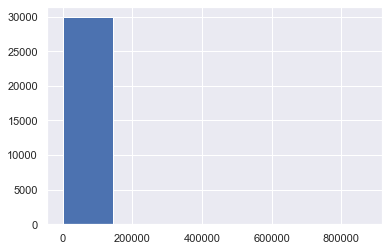

In [395]:
plt.hist(credit['PAY_AMT1'],6)
print(credit.PAY_AMT1.min())
print(credit.PAY_AMT1.max())

0
528666


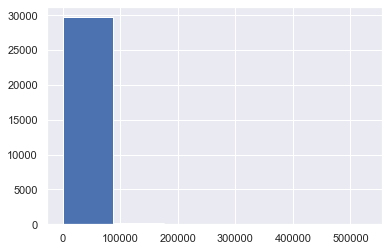

In [396]:
plt.hist(credit['PAY_AMT6'],6)
print(credit.PAY_AMT6.min())
print(credit.PAY_AMT6.max())

In [397]:
#calculate ratio of last bill amount to limit balance
ratio = credit.PAY_AMT6 / credit.LIMIT_BAL

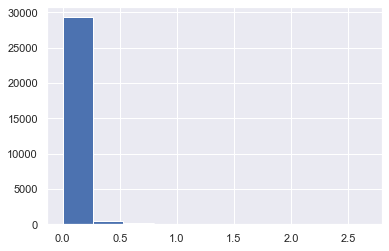

In [398]:
plt.hist(ratio)
plt.show()

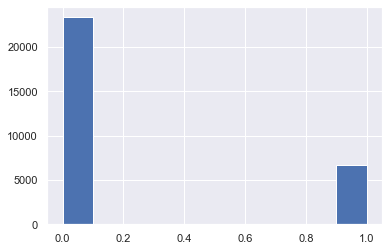

In [399]:
plt.hist(credit['default'])
plt.show()

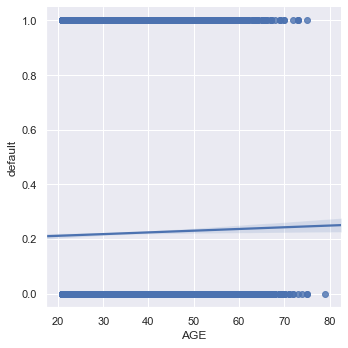

In [400]:
# Linear plot of age vs. default rate
sns.lmplot('AGE', 'default', data=credit)

Not a large difference by age, although the older you are the very slightly higher chance that you'll default.

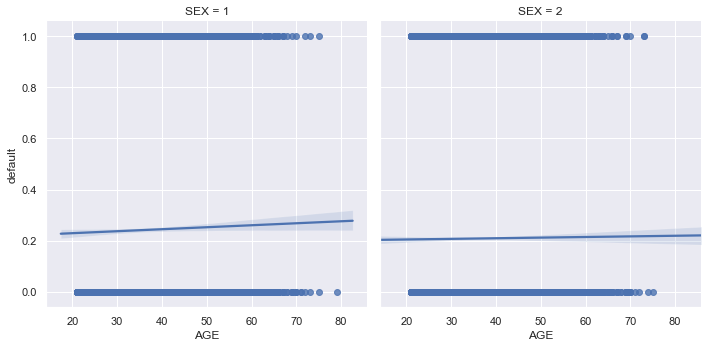

In [401]:
# default vs. Age grouped by Sex
sns.lmplot('AGE', 'default', data=credit, col='SEX')

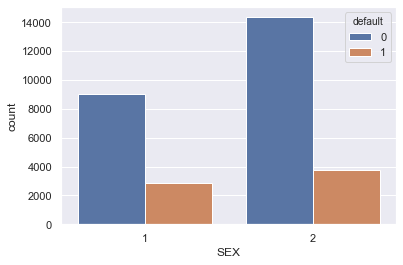

In [402]:
# default vs. sex
sns.countplot(x="SEX", hue="default", data=credit)

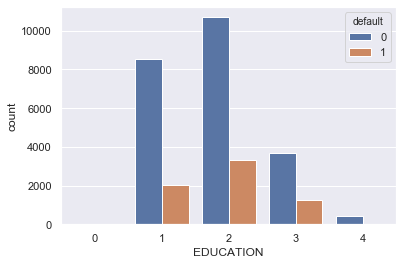

In [403]:
# default vs. Age grouped by Sex
sns.countplot('EDUCATION', hue='default', data=credit)

In [404]:
credit.groupby(['EDUCATION', 'default'])['EDUCATION'].count()

EDUCATION  default
0          0             14
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            421
           1             33
Name: EDUCATION, dtype: int64

Education level 3 has the highest proportion of clients that default.

In [405]:
credit.groupby(['MARRIAGE', 'default'])['MARRIAGE'].count()

MARRIAGE  default
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: MARRIAGE, dtype: int64

Overall, for each marriage group, there is a higher proportion of customers that do NOT default.

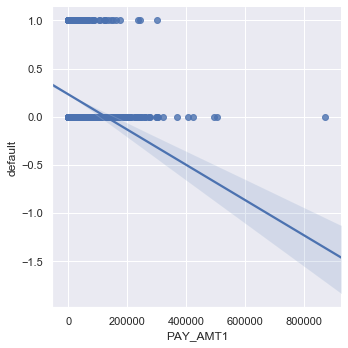

In [406]:
#payment amount versus default
sns.lmplot('PAY_AMT1', 'default', data=credit)

The higher the payment amount, the lower the chance of default.

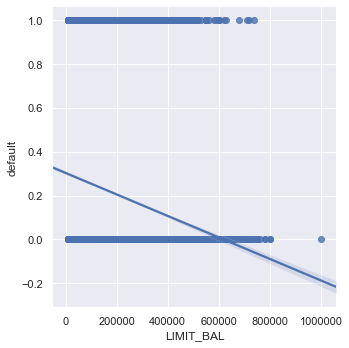

In [407]:
#limit balance versus default
sns.lmplot('LIMIT_BAL', 'default', data=credit)

The higher the limit balance, the lower the chance of default

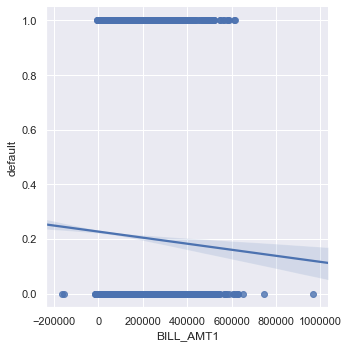

In [408]:
#bill amount versus default
sns.lmplot('BILL_AMT1', 'default', data=credit)

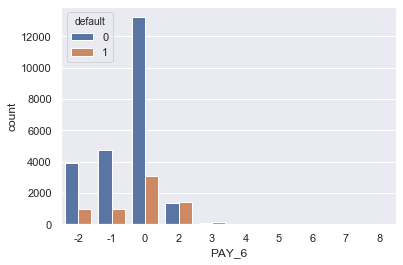

In [409]:
#bill amount versus default
sns.countplot('PAY_6', hue='default', data=credit)

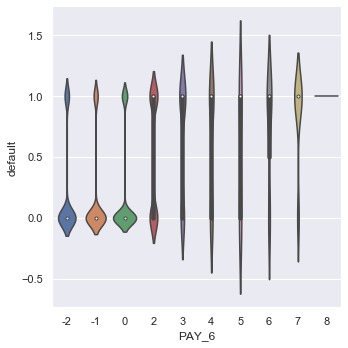

In [410]:
sns.catplot('PAY_6', 'default', kind='violin', data=credit)

Even those customers that paid in full, didn't consume, or used revolving credit in the sixth month still had a small rate of default.

In [411]:
#discretize age for new dataset
credit_v1 = credit.copy()
credit_v1['AGE'] = pd.qcut(credit_v1['AGE'],4)
credit_v1['AGE'].value_counts()

#bins = pd.IntervalIndex.from_tuples([(20.999, 34), (34, 49), (49, 60), (60, 79)])
#credit_v1['AGE'] = pd.cut(credit_v1['AGE'],bins)
#credit_v1['AGE'].value_counts()

(20.999, 28.0]    8013
(28.0, 34.0]      7683
(41.0, 79.0]      7450
(34.0, 41.0]      6854
Name: AGE, dtype: int64

In [412]:
#update new dataset with discretization for bill and payment amounts 
#plt.hist(credit['BILL_AMT1'])
#credit_v1 = credit.copy()
#plt.show()
bins = pd.IntervalIndex.from_tuples([(-16558, 0), (0, 15000), (15000, 60000), (60000, 964511.0)])
credit_v1['BILL_AMT1'] = pd.cut(credit_v1['BILL_AMT1'],bins)
credit_v1['BILL_AMT1'].value_counts()

(0.0, 15000.0]         9889
(15000.0, 60000.0]     9331
(60000.0, 964511.0]    8182
(-16558.0, 0.0]        2596
Name: BILL_AMT1, dtype: int64

In [413]:
#plt.hist(credit['BILL_AMT2'])
#plt.show()
#credit_v1 = credit.copy()
bins = pd.IntervalIndex.from_tuples([(-69777.001, 0), (0, 15000), (15000, 60000), (60000, 983931.0)])
credit_v1['BILL_AMT2'] = pd.cut(credit_v1['BILL_AMT2'],bins)
credit_v1['BILL_AMT2'].value_counts()

(0.0, 15000.0]         9508
(15000.0, 60000.0]     9411
(60000.0, 983931.0]    7906
(-69777.001, 0.0]      3175
Name: BILL_AMT2, dtype: int64

In [414]:
#plt.hist(credit['BILL_AMT3'])
#plt.show()
#credit_v1 = credit.copy()
bins = pd.IntervalIndex.from_tuples([(-157264.001, 0), (0, 15000), (15000, 60000), (60000, 1664089.0)])
credit_v1['BILL_AMT3'] = pd.cut(credit_v1['BILL_AMT3'],bins)
credit_v1['BILL_AMT3'].value_counts()

(15000.0, 60000.0]      9657
(0.0, 15000.0]          9303
(60000.0, 1664089.0]    7515
(-157264.001, 0.0]      3525
Name: BILL_AMT3, dtype: int64

In [415]:
#credit_v1 = credit.copy()
bins = pd.IntervalIndex.from_tuples([(-170000.001, 0), (0, 15000), (15000, 60000), (60000, 891586.0)])
#credit_v1['BILL_AMT4'] = pd.qcut(credit_v1['BILL_AMT4'],5)
credit_v1['BILL_AMT4'] = pd.cut(credit_v1['BILL_AMT4'],bins)
credit_v1['BILL_AMT4'].value_counts()

(15000.0, 60000.0]     9791
(0.0, 15000.0]         9416
(60000.0, 891586.0]    6923
(-170000.001, 0.0]     3870
Name: BILL_AMT4, dtype: int64

In [416]:
#credit_v1 = credit.copy()
bins = pd.IntervalIndex.from_tuples([(-81334.001, 0), (0, 15000), (15000, 60000), (60000, 927171.0)])
#credit_v1['BILL_AMT5'] = pd.qcut(credit_v1['BILL_AMT5'],5)
credit_v1['BILL_AMT5'] = pd.cut(credit_v1['BILL_AMT5'],bins)
credit_v1['BILL_AMT5'].value_counts()

(15000.0, 60000.0]     9705
(0.0, 15000.0]         9670
(60000.0, 927171.0]    6464
(-81334.001, 0.0]      4161
Name: BILL_AMT5, dtype: int64

In [417]:
#credit_v1 = credit.copy()
bins = pd.IntervalIndex.from_tuples([(-339603.001, 0), (0, 15000), (15000, 60000), (60000, 961664.0)])
#credit_v1['BILL_AMT6'] = pd.qcut(credit_v1['BILL_AMT6'],5)
credit_v1['BILL_AMT6'] = pd.cut(credit_v1['BILL_AMT6'],bins)
credit_v1['BILL_AMT6'].value_counts()

(0.0, 15000.0]         9594
(15000.0, 60000.0]     9455
(60000.0, 961664.0]    6243
(-339603.001, 0.0]     4708
Name: BILL_AMT6, dtype: int64

In [418]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT1'] = pd.qcut(credit_v1['PAY_AMT1'],4)
credit_v1['PAY_AMT1'].value_counts()

(-0.001, 1000.0]      7839
(5006.0, 873552.0]    7497
(2100.0, 5006.0]      7490
(1000.0, 2100.0]      7174
Name: PAY_AMT1, dtype: int64

In [419]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT2'] = pd.qcut(credit_v1['PAY_AMT2'],4)
credit_v1['PAY_AMT2'].value_counts()

(2009.0, 5000.0]       7751
(833.0, 2009.0]        7503
(-0.001, 833.0]        7502
(5000.0, 1684259.0]    7244
Name: PAY_AMT2, dtype: int64

In [420]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT3'] = pd.qcut(credit_v1['PAY_AMT3'],4)
credit_v1['PAY_AMT3'].value_counts()

(-0.001, 390.0]       7526
(4505.0, 896040.0]    7499
(1800.0, 4505.0]      7489
(390.0, 1800.0]       7486
Name: PAY_AMT3, dtype: int64

In [421]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT4'] = pd.qcut(credit_v1['PAY_AMT4'],4)
credit_v1['PAY_AMT4'].value_counts()

(296.0, 1500.0]        7655
(-0.001, 296.0]        7503
(4013.25, 621000.0]    7500
(1500.0, 4013.25]      7342
Name: PAY_AMT4, dtype: int64

In [422]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT5'] = pd.qcut(credit_v1['PAY_AMT5'],4)
credit_v1['PAY_AMT5'].value_counts()

(252.5, 1500.0]       7546
(4031.5, 426529.0]    7500
(-0.001, 252.5]       7500
(1500.0, 4031.5]      7454
Name: PAY_AMT5, dtype: int64

In [423]:
#credit_v1 = credit.copy()
credit_v1['PAY_AMT6'] = pd.qcut(credit_v1['PAY_AMT6'],4)
credit_v1['PAY_AMT6'].value_counts()

(117.75, 1500.0]      7742
(-0.001, 117.75]      7500
(4000.0, 528666.0]    7483
(1500.0, 4000.0]      7275
Name: PAY_AMT6, dtype: int64

### Feature Engineering

In [424]:
#Correlation checks
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.232171 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014533 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.232171  0.014533   1.000000 -0.149995  0.181614  0.113732   
MARRIAGE   -0.108139 -0.031389  -0.149995  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.181614 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.113732  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.131588  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.124089  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.117959  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.105927  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.091359  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.017950 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

In [425]:
# Create correlation matrix with absolute values only
corr_matrix_abs = credit.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [426]:
credit_CORR = credit.drop(columns=['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])

In [427]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.840400,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744097,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [428]:
#split data into test and training set for feature engineering

features = credit.iloc[:,0:23]
print('Summary of feature sample')
features.head(5)

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [429]:
#dependent variable - payment amount
y = credit['default']

In [430]:
X_train_v0, X_test_v0, y_train_v0, y_test_v0 = train_test_split(features, y, test_size=0.2)

In [431]:
X_train_v0.shape, X_test_v0.shape

((24000, 23), (6000, 23))

In [432]:
y_train_v0.shape, y_test_v0.shape

((24000,), (6000,))

In [433]:
#scale data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_v0)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train_v0)
X_test_scaled = scaler.transform(X_test_v0)

#### RFE

In [434]:
#RFE using random forest
model = RandomForestClassifier(n_estimators=10)

#select top 12 features
rfe = RFE(model, 12)
fit = rfe.fit(X_train_v0, y_train_v0)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True False False False False False  True
  True  True  True  True  True  True  True  True False False False]
[ 1 12  8  9  1  1  5  7 11 10  6  1  1  1  1  1  1  1  1  1  2  4  3]


In [448]:
cols = list(features.columns)

model = RandomForestClassifier(n_estimators=10)

#Initializing RFE model with random forest
rfe = RFE(model, 12)  

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_v0,y_train_v0) 

#Fitting the data to model
model.fit(X_rfe,y_train_v0)

temp = pd.Series(rfe.support_,index = cols)

selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2'],
      dtype='object')


In [449]:
#create new df with only selected columns
credit_RFE = pd.DataFrame(credit[selected_features_rfe])

In [450]:
print(type(credit_RFE))

<class 'pandas.core.frame.DataFrame'>


In [451]:
print(credit_RFE.head())

   LIMIT_BAL  AGE  PAY_0  PAY_2  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0      20000   24      2      2       3913       3102        689          0   
1     120000   26     -1      2       2682       1725       2682       3272   
2      90000   34      0      0      29239      14027      13559      14331   
3      50000   37      0      0      46990      48233      49291      28314   
4      50000   57     -1      0       8617       5670      35835      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  
0          0          0         0       689  
1       3455       3261         0      1000  
2      14948      15549      1518      1500  
3      28959      29547      2000      2019  
4      19146      19131      2000     36681  


In [443]:
#after EDA, discretize age 
credit_CORR['AGE'] = pd.qcut(credit_CORR['AGE'],4)

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [452]:
credit_RFE['AGE'] = pd.qcut(credit_RFE['AGE'],4)

In [441]:
print(credit_CORR.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE             AGE  PAY_0  PAY_2  PAY_3  \
0      20000    2          2         1  (20.999, 28.0]      2      2     -1   
1     120000    2          2         2  (20.999, 28.0]     -1      2      0   
2      90000    2          2         2    (28.0, 34.0]      0      0      0   
3      50000    2          2         1    (34.0, 41.0]      0      0      0   
4      50000    1          2         1    (41.0, 79.0]     -1      0     -1   

   PAY_4  PAY_5  PAY_6  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -1     -2     -2       3913         0       689         0         0   
1      0      0      2       2682         0      1000      1000      1000   
2      0      0      0      29239      1518      1500      1000      1000   
3      0      0      0      46990      2000      2019      1200      1100   
4      0      0      0       8617      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default  
0         0         0        

In [442]:
print(credit_RFE.head())

   LIMIT_BAL  AGE  PAY_0  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0      20000   24      2       3913       3102        689          0   
1     120000   26     -1       2682       1725       2682       3272   
2      90000   34      0      29239      14027      13559      14331   
3      50000   37      0      46990      48233      49291      28314   
4      50000   57     -1       8617       5670      35835      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  default  
0          0          0         0       689         0        1  
1       3455       3261         0      1000      1000        1  
2      14948      15549      1518      1500      1000        0  
3      28959      29547      2000      2019      1200        0  
4      19146      19131      2000     36681     10000        0  


In [109]:
#save new csv files
credit.to_csv("credit_v0.csv", header = 1, index = False) #only removed ID & renamed dv
credit_v1.to_csv("credit_v1.csv", header = 1, index = False) #removed ID, discretized age/bill/pay, renamed dv
credit_CORR.to_csv("credit_CORR.csv", header = 1, index = False) #removed ID, discretized age, renamed dv, removed CORR features
credit_RFE.to_csv("credit_RFE.csv", header = 1, index = False) #removed ID, discretized age, renamed dv, RFE datasets

### One hot encoding for discretized dataset & age

In [110]:
credit_v1_OHE = pd.get_dummies(credit_v1)

In [111]:
print(credit_v1_OHE.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'AGE_(20.999, 28.0]',
       'AGE_(28.0, 34.0]', 'AGE_(34.0, 41.0]', 'AGE_(41.0, 79.0]',
       'BILL_AMT1_(-16558.0, 0.0]', 'BILL_AMT1_(0.0, 15000.0]',
       'BILL_AMT1_(15000.0, 60000.0]', 'BILL_AMT1_(60000.0, 964511.0]',
       'BILL_AMT2_(-69777.001, 0.0]', 'BILL_AMT2_(0.0, 15000.0]',
       'BILL_AMT2_(15000.0, 60000.0]', 'BILL_AMT2_(60000.0, 983931.0]',
       'BILL_AMT3_(-157264.001, 0.0]', 'BILL_AMT3_(0.0, 15000.0]',
       'BILL_AMT3_(15000.0, 60000.0]', 'BILL_AMT3_(60000.0, 1664089.0]',
       'BILL_AMT4_(-170000.001, 0.0]', 'BILL_AMT4_(0.0, 15000.0]',
       'BILL_AMT4_(15000.0, 60000.0]', 'BILL_AMT4_(60000.0, 891586.0]',
       'BILL_AMT5_(-81334.001, 0.0]', 'BILL_AMT5_(0.0, 15000.0]',
       'BILL_AMT5_(15000.0, 60000.0]', 'BILL_AMT5_(60000.0, 927171.0]',
       'BILL_AMT6_(-339603.001, 0.0]', 'BILL_AMT6_(0.0, 15000.0]',
       'BILL_AMT6_(15000.0, 6

In [454]:
credit_CORR_OHE = pd.get_dummies(credit_CORR)

In [455]:
print(credit_CORR_OHE.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'AGE_(20.999, 28.0]', 'AGE_(28.0, 34.0]', 'AGE_(34.0, 41.0]',
       'AGE_(41.0, 79.0]'],
      dtype='object')


In [456]:
credit_RFE_OHE = pd.get_dummies(credit_RFE)

In [457]:
#RFE data set, add back default column
credit_RFE_OHE['default'] = credit['default']

print(credit_RFE_OHE.head())

   LIMIT_BAL  PAY_0  PAY_2  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0      20000      2      2       3913       3102        689          0   
1     120000     -1      2       2682       1725       2682       3272   
2      90000      0      0      29239      14027      13559      14331   
3      50000      0      0      46990      48233      49291      28314   
4      50000     -1      0       8617       5670      35835      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  AGE_(20.999, 28.0]  \
0          0          0         0       689                   1   
1       3455       3261         0      1000                   1   
2      14948      15549      1518      1500                   0   
3      28959      29547      2000      2019                   0   
4      19146      19131      2000     36681                   0   

   AGE_(28.0, 34.0]  AGE_(34.0, 41.0]  AGE_(41.0, 79.0]  default  
0                 0                 0                 0        1  
1                 

In [458]:
print(credit_RFE_OHE.columns)

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'AGE_(20.999, 28.0]', 'AGE_(28.0, 34.0]', 'AGE_(34.0, 41.0]',
       'AGE_(41.0, 79.0]', 'default'],
      dtype='object')


## Make test/train splits

In [116]:
#original data set - already completed as X_train_v0, X_test_v0, y_train_v0, y_test_v0

In [117]:
print(credit_v1_OHE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 63 columns):
LIMIT_BAL                         30000 non-null int64
SEX                               30000 non-null int64
EDUCATION                         30000 non-null int64
MARRIAGE                          30000 non-null int64
PAY_0                             30000 non-null int64
PAY_2                             30000 non-null int64
PAY_3                             30000 non-null int64
PAY_4                             30000 non-null int64
PAY_5                             30000 non-null int64
PAY_6                             30000 non-null int64
default                           30000 non-null int64
AGE_(20.999, 28.0]                30000 non-null uint8
AGE_(28.0, 34.0]                  30000 non-null uint8
AGE_(34.0, 41.0]                  30000 non-null uint8
AGE_(41.0, 79.0]                  30000 non-null uint8
BILL_AMT1_(-16558.0, 0.0]         30000 non-null uint8
BILL_AMT1_(

In [118]:
#move default to last column
cols = list(credit_v1_OHE.columns.values) 
cols.pop(cols.index('default')) 
credit_v1_OHE = credit_v1_OHE[cols+['default']]

In [119]:
#v1 data set
features_v1 = credit_v1_OHE.iloc[:,0:62]
print('Summary of feature sample')
features_v1.head(5)

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,"AGE_(20.999, 28.0]","AGE_(28.0, 34.0]","AGE_(34.0, 41.0]","AGE_(41.0, 79.0]","BILL_AMT1_(-16558.0, 0.0]",...,"PAY_AMT3_(390.0, 1800.0]","PAY_AMT3_(1800.0, 4505.0]","PAY_AMT3_(4505.0, 896040.0]","PAY_AMT4_(-0.001, 296.0]","PAY_AMT4_(296.0, 1500.0]","PAY_AMT4_(1500.0, 4013.25]","PAY_AMT4_(4013.25, 621000.0]","PAY_AMT5_(-0.001, 252.5]","PAY_AMT5_(252.5, 1500.0]","PAY_AMT5_(1500.0, 4031.5]","PAY_AMT5_(4031.5, 426529.0]","PAY_AMT6_(-0.001, 117.75]","PAY_AMT6_(117.75, 1500.0]","PAY_AMT6_(1500.0, 4000.0]","PAY_AMT6_(4000.0, 528666.0]"
0,20000,2,2,1,2,2,-1,-1,-2,-2,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,90000,2,2,2,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,50000,2,2,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [120]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(features_v1, y, test_size=0.2)

In [121]:
X_train_v1.shape, y_train_v1.shape

((24000, 62), (24000,))

In [122]:
#CORR data set
#move default to last column
cols = list(credit_CORR_OHE.columns.values) 
cols.pop(cols.index('default')) 
credit_CORR_OHE = credit_CORR_OHE[cols+['default']]

In [123]:
print(credit_CORR_OHE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
LIMIT_BAL             30000 non-null int64
SEX                   30000 non-null int64
EDUCATION             30000 non-null int64
MARRIAGE              30000 non-null int64
PAY_0                 30000 non-null int64
PAY_2                 30000 non-null int64
PAY_3                 30000 non-null int64
PAY_4                 30000 non-null int64
PAY_5                 30000 non-null int64
PAY_6                 30000 non-null int64
BILL_AMT1             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
PAY_AMT4              30000 non-null int64
PAY_AMT5              30000 non-null int64
PAY_AMT6              30000 non-null int64
AGE_(20.999, 28.0]    30000 non-null uint8
AGE_(28.0, 34.0]      30000 non-null uint8
AGE_(34.0, 41.0]      30000 non-null uint8
AGE_(41.0, 79.0]      30000 non

In [124]:
#CORR data set
features_CORR = credit_CORR_OHE.iloc[:,0:21]
print('Summary of feature sample')
features_CORR.head(5)

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,"AGE_(20.999, 28.0]","AGE_(28.0, 34.0]","AGE_(34.0, 41.0]","AGE_(41.0, 79.0]"
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1,0,0,0
2,90000,2,2,2,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0,1,0,0
3,50000,2,2,1,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0,0,1,0
4,50000,1,2,1,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0,0,0,1


In [125]:
X_train_CORR, X_test_CORR, y_train_CORR, y_test_CORR = train_test_split(features_CORR, y, test_size=0.2)

In [126]:
X_train_CORR.shape, X_test_CORR.shape, y_train_CORR.shape, y_test_CORR.shape

((24000, 21), (6000, 21), (24000,), (6000,))

In [453]:
#RFE data set
print(credit_RFE_OHE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
LIMIT_BAL             30000 non-null int64
PAY_0                 30000 non-null int64
BILL_AMT1             30000 non-null int64
BILL_AMT2             30000 non-null int64
BILL_AMT3             30000 non-null int64
BILL_AMT4             30000 non-null int64
BILL_AMT5             30000 non-null int64
BILL_AMT6             30000 non-null int64
PAY_AMT1              30000 non-null int64
PAY_AMT2              30000 non-null int64
PAY_AMT3              30000 non-null int64
AGE_(20.999, 28.0]    30000 non-null uint8
AGE_(28.0, 34.0]      30000 non-null uint8
AGE_(34.0, 41.0]      30000 non-null uint8
AGE_(41.0, 79.0]      30000 non-null uint8
default               30000 non-null int64
dtypes: int64(12), uint8(4)
memory usage: 2.9 MB
None


In [311]:
features_RFE = credit_RFE_OHE.iloc[:,0:15]
print('Summary of feature sample')
features_RFE.head(5)

Summary of feature sample


,LIMIT_BAL,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,"AGE_(20.999, 28.0]","AGE_(28.0, 34.0]","AGE_(34.0, 41.0]","AGE_(41.0, 79.0]"
0,20000,2,3913,3102,689,0,0,0,0,689,0,1,0,0,0
1,120000,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1,0,0,0
2,90000,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,0,1,0,0
3,50000,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,0,0,1,0
4,50000,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,0,0,0,1


In [312]:
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(features_RFE, y, test_size=0.2)

In [313]:
X_train_RFE.shape, X_test_RFE.shape, y_train_RFE.shape, y_test_RFE.shape

((24000, 15), (6000, 15), (24000,), (6000,))

## Modelling

#### K-Nearest Neighbors

In [477]:
#original data (v0)

#set k_range to try k values from 1 to 14
k_range = range(1,15)

#make a list of each accuracy (defined later) for each k
scores_v0 = {}
scores_v0_list = []

#make a list of kappa for each k
kappa_v0 = {}
kappa_v0_list = []

#fit data
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_v0,y_train_v0)
    
    y_pred = knn.predict(X_test_v0)
    
    scores_v0[k] = metrics.accuracy_score(y_test_v0,y_pred)
    scores_v0_list.append(scores[k])
    
    kappa_v0[k] = metrics.cohen_kappa_score(y_test_v0,y_pred_v0)
    kappa_v0_list.append(kappa_v0[k])

print(scores_v0)
print(kappa_v0)

{1: 0.6903333333333334, 2: 0.7536666666666667, 3: 0.7345, 4: 0.7591666666666667, 5: 0.748, 6: 0.761, 7: 0.7545, 8: 0.7621666666666667, 9: 0.7561666666666667, 10: 0.7635, 11: 0.7585, 12: 0.7635, 13: 0.764, 14: 0.7655}
{1: 0.3771253493148379, 2: 0.3771253493148379, 3: 0.3771253493148379, 4: 0.3771253493148379, 5: 0.3771253493148379, 6: 0.3771253493148379, 7: 0.3771253493148379, 8: 0.3771253493148379, 9: 0.3771253493148379, 10: 0.3771253493148379, 11: 0.3771253493148379, 12: 0.3771253493148379, 13: 0.3771253493148379, 14: 0.3771253493148379}


In [478]:
#find key (k-value) for best accuracy
max_key = max(scores_v0, key=lambda k: scores_v0[k])

print("Best K-value for accuracy:",max_key)
print("Best Accuracy:",max(scores_v0_list))
print("Best Kappa:",kappa_v0[max_key])

Best K-value for accuracy: 14
Best Accuracy: 0.7751666666666667
Best Kappa: 0.3771253493148379


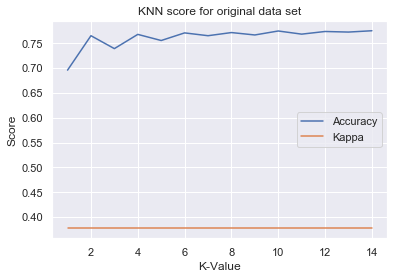

In [479]:
plt.plot(k_range,scores_v0_list)
plt.plot(k_range,kappa_v0_list)
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN score for original data set")
plt.show()

Kappa is low for this model and data combination. Accuracy is not great either, since it does not do much better than probability for predicting default rate.

In [480]:
#v1 discretized data set
scores_v1 = {}
scores_v1_list = []

kappa_v1 = {}
kappa_v1_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_v1,y_train_v1)
    
    y_pred_v1 = knn.predict(X_test_v1)
    
    scores_v1[k] = metrics.accuracy_score(y_test_v1,y_pred_v1)
    scores_v1_list.append(scores_v1[k])
    
    kappa_v1[k] = metrics.cohen_kappa_score(y_test_v1,y_pred_v1)
    kappa_v1_list.append(kappa_v1[k])

In [481]:
print(scores_v1)
print(kappa_v1)

{1: 0.7261666666666666, 2: 0.7891666666666667, 3: 0.7776666666666666, 4: 0.7933333333333333, 5: 0.7955, 6: 0.8003333333333333, 7: 0.7996666666666666, 8: 0.7996666666666666, 9: 0.8033333333333333, 10: 0.8035, 11: 0.8008333333333333, 12: 0.8041666666666667, 13: 0.8048333333333333, 14: 0.8056666666666666}
{1: 0.20713663887703904, 2: 0.19714280153370056, 3: 0.2751162177803016, 4: 0.22439907086344602, 5: 0.2954498039088086, 6: 0.25277946702842624, 7: 0.28930870786035223, 8: 0.24496934127448589, 9: 0.2933566139724956, 10: 0.26124980575694623, 11: 0.2728236026245692, 12: 0.25798377878865075, 13: 0.2820035717920808, 14: 0.2639296267904365}


In [482]:
#find key (k-value) for best accuracy
max_key = max(scores_v1, key=lambda k: scores_v1[k])

print("Best K-value for accuracy:",max_key)
print("Best Accuracy:",max(scores_v1_list))
print("Best Kappa:",kappa_v1[max_key])

Best K-value for accuracy: 14
Best Accuracy: 0.8056666666666666
Best Kappa: 0.2639296267904365


In [484]:
print(cross_val_score(knn_v1, X_train_v1, y_train_v1, cv=5))

[0.80462404 0.79541667 0.803125   0.79291667 0.7966243 ]


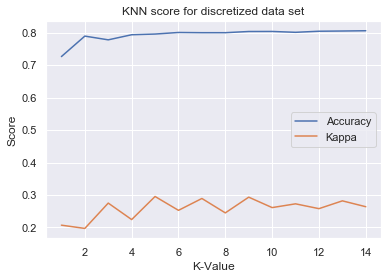

In [483]:
plt.plot(k_range,scores_v1_list)
plt.plot(k_range,kappa_v1_list)
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN score for discretized data set")
plt.show()

Results not much better here. Let's continue to run KNN for the other data sets, but not hopeful this will be our final model.

In [485]:
#CORR data set
scores_CORR = {}
scores_CORR_list = []

kappa_CORR = {}
kappa_CORR_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_CORR,y_train_CORR)
    
    y_pred_CORR = knn.predict(X_test_CORR)
    
    scores_CORR[k] = metrics.accuracy_score(y_test_CORR,y_pred_CORR)
    scores_CORR_list.append(scores_CORR[k])
    
    kappa_CORR[k] = metrics.cohen_kappa_score(y_test_CORR,y_pred_CORR)
    kappa_CORR_list.append(kappa_CORR[k])
    
print(scores_CORR)
print(kappa_CORR)

{1: 0.6926666666666667, 2: 0.7615, 3: 0.7318333333333333, 4: 0.764, 5: 0.7518333333333334, 6: 0.7698333333333334, 7: 0.7605, 8: 0.7716666666666666, 9: 0.7658333333333334, 10: 0.776, 11: 0.771, 12: 0.7776666666666666, 13: 0.7748333333333334, 14: 0.7746666666666666}
{1: 0.09578603930911656, 2: 0.06397133436740554, 3: 0.10300685037403523, 4: 0.0734469931195586, 5: 0.10400483961746809, 6: 0.07521619583720063, 7: 0.09609907307696175, 8: 0.0719022819235694, 9: 0.0902148560683208, 10: 0.07774039993403281, 11: 0.09170456556176487, 12: 0.07970148478046568, 13: 0.09463347510632958, 14: 0.0658547095455323}


In [486]:
#find key (k-value) for best accuracy
max_key_CORR = max(scores_CORR, key=lambda k: scores_CORR[k])

print("Best K-value for accuracy:",max_key_CORR)
print("Best Accuracy:",max(scores_CORR_list))
print("Best Kappa:",kappa_CORR[max_key_CORR])

Best K-value for accuracy: 12
Best Accuracy: 0.7776666666666666
Best Kappa: 0.07970148478046568


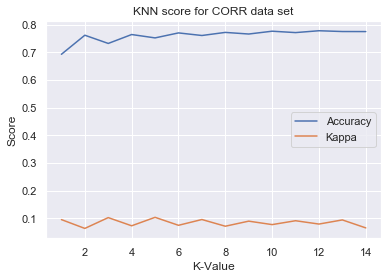

In [487]:
plt.plot(k_range,scores_CORR_list)
plt.plot(k_range,kappa_CORR_list)
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN score for CORR data set")
plt.show()

In [488]:
#RFE data set
scores_RFE = {}
scores_RFE_list = []

kappa_RFE = {}
kappa_RFE_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_RFE,y_train_RFE)
    
    y_pred_RFE = knn.predict(X_test_RFE)
    
    scores_RFE[k] = metrics.accuracy_score(y_test_RFE,y_pred_RFE)
    scores_RFE_list.append(scores_RFE[k])
    
    kappa_RFE[k] = metrics.cohen_kappa_score(y_test_RFE,y_pred_RFE)
    kappa_RFE_list.append(kappa_RFE[k])
    
print(scores_RFE)
print(kappa_RFE)

{1: 0.698, 2: 0.7715, 3: 0.7428333333333333, 4: 0.7775, 5: 0.7585, 6: 0.7806666666666666, 7: 0.7701666666666667, 8: 0.784, 9: 0.7746666666666666, 10: 0.7835, 11: 0.7758333333333334, 12: 0.7823333333333333, 13: 0.7763333333333333, 14: 0.7818333333333334}
{1: 0.11272287818595894, 2: 0.08598578200105322, 3: 0.1337806460884835, 4: 0.0930464174540897, 5: 0.12087405383235816, 6: 0.09772559659695379, 7: 0.12231794621126502, 8: 0.09698346490324505, 9: 0.11753859408842238, 10: 0.09008253000486122, 11: 0.10331938496821047, 12: 0.0855530688470244, 13: 0.10357534498210386, 14: 0.08082297591461263}


In [489]:
#find key (k-value) for best accuracy
max_key_RFE = max(scores_RFE, key=lambda k: scores_RFE[k])

print("Best K-value for accuracy:",max_key_RFE)
print("Best Accuracy:",max(scores_RFE_list))
print("Best Kappa:",kappa_RFE[max_key_RFE])

Best K-value for accuracy: 8
Best Accuracy: 0.784
Best Kappa: 0.09698346490324505


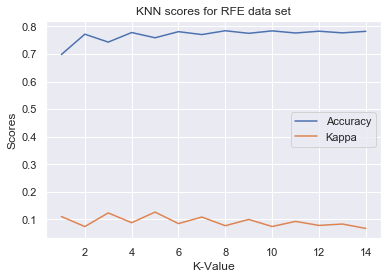

In [490]:
plt.plot(k_range,scores_RFE_list)
plt.plot(k_range,f1_RFE_list)
plt.xlabel("K-Value")
plt.ylabel("Scores")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN scores for RFE data set")
plt.show()

Best dataset for KNN was V1 discretized data set.

In [491]:
#save this classifier as it has highest accuracy
knn_v1 = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_v1,y_train_v1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

#### Random Forest

In [186]:
#parallel processing since using a grid search requires more computing power
from multiprocessing import Pool
import workers

if __name__ ==  '__main__': 
 num_processors = 3
 p=Pool(processes = num_processors)
 output = p.map(workers.worker,[i for i in range(0,3)])
 print(output)

[0, 1, 4]


Metrics: for random forest, let's look at precision and recall as well. For this problem, it is more important to reduce the number of false negatives (a case where someone is incorrectly classified as not a default risk, but does default). False negatives are more impactful to business versus false positive (although this is also harmful, but not as much risk as false negative).

This means we should look at both accuracy and recall as primary metrics. 

In [495]:
#original data
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2,5,10,20]}

# create the grid
grid_RF = GridSearchCV(RandomForestClassifier(n_estimators=10), param_grid, cv = 3, scoring='recall')

#training
grid_RF.fit(X_train_v0, y_train_v0)

#print best estimator
print(grid_RF.best_estimator_)

#with its score
print("Recall:",np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Recall: 0.3522770761576732


In [496]:
rf_v0 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_v0.fit(X_train_v0,y_train_v0)
y_pred_v0 = rf_v0.predict(X_test_v0)

print("Accuracy:",metrics.accuracy_score(y_test_v0, y_pred_v0))
print("Kappa:",metrics.cohen_kappa_score(y_test_v0,y_pred_v0))
print("Precision:",metrics.precision_score(y_test_v0,y_pred_v0))
print("Recall:",metrics.recall_score(y_test_v0,y_pred_v0))

Accuracy: 0.8155
Kappa: 0.3630866420800083
Precision: 0.7447495961227787
Recall: 0.32695035460992905


In [497]:
feature_imp = pd.Series(rf_v0.feature_importances_,index=features.columns).sort_values(ascending=False)
feature_imp

PAY_0        0.394100
PAY_4        0.128005
PAY_2        0.113856
PAY_6        0.066027
PAY_5        0.062474
LIMIT_BAL    0.035954
PAY_3        0.035933
PAY_AMT1     0.034779
PAY_AMT2     0.031453
PAY_AMT5     0.016364
PAY_AMT4     0.016134
BILL_AMT5    0.010678
BILL_AMT1    0.009898
BILL_AMT3    0.009453
BILL_AMT6    0.009003
PAY_AMT3     0.008778
BILL_AMT2    0.006474
PAY_AMT6     0.003331
EDUCATION    0.003027
BILL_AMT4    0.003012
AGE          0.001266
MARRIAGE     0.000000
SEX          0.000000
dtype: float64

In [498]:
#discretized (v1) data set

#training
grid_RF.fit(X_train_v1, y_train_v1)

#let's see the best estimator
print(grid_RF.best_estimator_)

#with its F1 score
print("Recall:",np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Recall: 0.32088322320544377


In [500]:
#best estimator/model
rf_v1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_v1.fit(X_train_v1,y_train_v1)
y_pred_v1 = rf_v1.predict(X_test_v1)

print("Accuracy:",metrics.accuracy_score(y_test_v1, y_pred_v1))
print("Kappa:",metrics.cohen_kappa_score(y_test_v1,y_pred_v1))
print("Precision:",metrics.precision_score(y_test_v1,y_pred_v1))
print("Recall:",metrics.recall_score(y_test_v1,y_pred_v1))

Accuracy: 0.8126666666666666
Kappa: 0.29745126068120986
Precision: 0.6763005780346821
Recall: 0.2685539403213466


In [301]:
#CORR data set

#training
grid_RF.fit(X_train_CORR, y_train_CORR)

#let's see the best estimator
print(grid_RF.best_estimator_)

#with its F1 score
print("F1 Score",np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1 Score 0.46287897325473343


In [302]:
#best estimator/model
rf_CORR = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_CORR.fit(X_train_CORR,y_train_CORR)
y_pred_CORR = rf_CORR.predict(X_test_CORR)

print("Accuracy:",metrics.accuracy_score(y_test_CORR, y_pred_CORR))
print("Kappa:",metrics.cohen_kappa_score(y_test_CORR,y_pred_CORR))
print("F1 Score:",metrics.f1_score(y_test_CORR,y_pred_CORR))

Accuracy: 0.819
Kappa: 0.368620925080807
F1 Score: 0.46449704142011833


In [460]:
#RFE data set

#training
grid_RF.fit(X_train_RFE, y_train_RFE)

#let's see the best estimator
print(grid_RF.best_estimator_)

#with its F1 score
print("F1 Score",np.abs(grid_RF.best_score_))

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1 Score 0.44992846323955943


In [461]:
#best estimator/model
rf_RFE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_RFE.fit(X_train_RFE,y_train_RFE)
y_pred_RFE = rf_RFE.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_RFE))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE,y_pred_RFE))
print("F1 Score:",metrics.f1_score(y_test_RFE,y_pred_RFE))

Accuracy: 0.8255
Kappa: 0.3419351756913661
F1 Score: 0.42942779291553135


In [464]:
#modify grid with 100 n_estimators
rf_RFE_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_RFE_2.fit(X_train_RFE,y_train_RFE)
y_pred_RFE_2 = rf_RFE_2.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_RFE_2))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE,y_pred_RFE_2))
print("F1 Score:",metrics.f1_score(y_test_RFE,y_pred_RFE_2))

Accuracy: 0.8275
Kappa: 0.3560915399345599
F1 Score: 0.4444444444444445


Not much change increasing number of estimators, but best results so far.

In [465]:
#modify to set no max depth
rf_RFE_3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_RFE_3.fit(X_train_RFE,y_train_RFE)
y_pred_RFE_3 = rf_RFE_3.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_RFE_3))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE,y_pred_RFE_3))
print("F1 Score:",metrics.f1_score(y_test_RFE,y_pred_RFE_3))

Accuracy: 0.8273333333333334
Kappa: 0.35288462919852015
F1 Score: 0.4406047516198705


#### Decision Tree

In [466]:
#original data set

#use same grid as RF classifier

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, scoring='f1')

#training
grid_tree.fit(X_train_v0, y_train_v0)

#print best estimator
print(grid_tree.best_estimator_)

#with its score
print("F1 Score:",np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
F1 Score: 0.46726499234340996


In [467]:
tree_v0 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

tree_v0.fit(X_train_v0,y_train_v0)
y_pred_v0 = tree_v0.predict(X_test_v0)

print("Accuracy:",metrics.accuracy_score(y_test_v0, y_pred_v0))
print("Kappa:",metrics.cohen_kappa_score(y_test_v0,y_pred_v0))
print("F1 Score:",metrics.f1_score(y_test_v0,y_pred_v0))

Accuracy: 0.815
Kappa: 0.3771253493148379
F1 Score: 0.4744318181818182


In [468]:
#discretized data set

#use same grid as RF classifier

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, scoring='f1')

#training
grid_tree.fit(X_train_v1, y_train_v1)

#print best estimator
print(grid_tree.best_estimator_)

#with its score
print("F1 Score:",np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
F1 Score: 0.4660786664026288


In [469]:
tree_v1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

tree_v1.fit(X_train_v1,y_train_v1)
y_pred_v1 = tree_v1.predict(X_test_v1)

print("Accuracy:",metrics.accuracy_score(y_test_v1, y_pred_v1))
print("Kappa:",metrics.cohen_kappa_score(y_test_v1,y_pred_v1))
print("F1 Score:",metrics.f1_score(y_test_v1,y_pred_v1))

Accuracy: 0.8253333333333334
Kappa: 0.39292115949741446
F1 Score: 0.48878048780487804


In [471]:
#discretized data set

#use same grid as RF classifier

# change grid for accuracy instead of f1
grid_tree_1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, scoring='accuracy')

#training
grid_tree_1.fit(X_train_v1, y_train_v1)

#print best estimator
print(grid_tree_1.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_tree_1.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 0.8186666666666667


In [155]:
#CORR data set
clf.fit(X_train_CORR,y_train_CORR)
y_pred_CORR = clf.predict(X_test_CORR)

print("Accuracy:",metrics.accuracy_score(y_test_CORR, y_pred_CORR))
print("Kappa:",metrics.cohen_kappa_score(y_test_CORR,y_pred_CORR))

Accuracy: 0.7228333333333333
Kappa: 0.22438656735166485


In [156]:
#RFE data set
clf.fit(X_train_RFE,y_train_RFE)
y_pred_RFE = clf.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_RFE))
print("Kappa:", metrics.cohen_kappa_score(y_test_RFE,y_pred_RFE))

Accuracy: 0.7153333333333334
Kappa: 0.1894183982091272


#### Support Vector Machine

In [157]:
#original data set
svc = SVC(gamma='auto')
svc.fit(X_train_v0,y_train_v0)
y_pred_v0 = svc.predict(X_test_v0)

print("Accuracy:",metrics.accuracy_score(y_test_v0, y_pred_v0))
print("Kappa:", metrics.cohen_kappa_score(y_test_v0,y_pred_v0))

Accuracy: 0.7791666666666667
Kappa: 0.015951244654572982


In [158]:
#discretized data set
svc.fit(X_train_v1,y_train_v1)
y_pred_svc_v1 = svc.predict(X_test_v1)

print("Accuracy:",metrics.accuracy_score(y_test_v1, y_pred_svc_v1))
print("Kappa:",metrics.cohen_kappa_score(y_test_v1,y_pred_svc_v1))

Accuracy: 0.8131666666666667
Kappa: 0.3069051863606854


In [159]:
#CORR data set
svc.fit(X_train_CORR,y_train_CORR)
y_pred_svc_CORR = svc.predict(X_test_CORR)

print("Accuracy:",metrics.accuracy_score(y_test_CORR, y_pred_svc_CORR))
print("Kappa:",metrics.cohen_kappa_score(y_test_CORR,y_pred_svc_CORR))

Accuracy: 0.7791666666666667
Kappa: 0.027522459949827383


In [160]:
#RFE data set
svc.fit(X_train_RFE,y_train_RFE)
y_pred_svc_RFE = svc.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_svc_RFE))
print("Kappa:", metrics.cohen_kappa_score(y_test_RFE,y_pred_svc_RFE))

Accuracy: 0.7776666666666666
Kappa: 0.02285737306851343


#### Logistic Regression

In [161]:
#original data set
log = LogisticRegression()
log.fit(X_train_v0,y_train_v0)
y_pred_v0 = log.predict(X_test_v0)

print("Accuracy:",metrics.accuracy_score(y_test_v0, y_pred_v0))
print("Kappa:", metrics.cohen_kappa_score(y_test_v0,y_pred_v0))

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy: 0.7795
Kappa: 0.0


In [162]:
#discretized data set
log.fit(X_train_v1,y_train_v1)
y_pred_log_v1 = log.predict(X_test_v1)

print("Accuracy:",metrics.accuracy_score(y_test_v1, y_pred_log_v1))
print("Kappa:",metrics.cohen_kappa_score(y_test_v1,y_pred_log_v1))

Accuracy: 0.7821666666666667
Kappa: 0.0


C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [163]:
#CORR data set
log.fit(X_train_CORR,y_train_CORR)
y_pred_log_CORR = log.predict(X_test_CORR)

print("Accuracy:",metrics.accuracy_score(y_test_CORR, y_pred_log_CORR))
print("Kappa:",metrics.cohen_kappa_score(y_test_CORR,y_pred_log_CORR))

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy: 0.7771666666666667
Kappa: 0.0


In [164]:
#RFE data set
log.fit(X_train_RFE,y_train_RFE)
y_pred_log_RFE = log.predict(X_test_RFE)

print("Accuracy:",metrics.accuracy_score(y_test_RFE, y_pred_log_RFE))
print("Kappa:", metrics.cohen_kappa_score(y_test_RFE,y_pred_log_RFE))

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy: 0.7783333333333333
Kappa: -0.00033319368782258607
